In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("E:/projecctosssss/decision_tree/Movie_classification.csv",header=0)

In [3]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [4]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [5]:
df = pd.get_dummies(df,columns=["3D_available","Genre"],drop_first=True)

In [6]:
X=df.loc[:,df.columns!="Start_Tech_Oscar"]
y=df["Start_Tech_Oscar"]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [8]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

## Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier

In [10]:
bag_clf =BaggingClassifier(base_estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1,random_state=42)

In [11]:
bag_clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [13]:
confusion_matrix(y_test, bag_clf.predict(X_test))

array([[27, 17],
       [22, 36]], dtype=int64)

In [14]:
accuracy_score(y_test, bag_clf.predict(X_test))

0.6176470588235294

## Random Forest 

In [15]:
from sklearn.ensemble import RandomForestClassifier 

In [16]:
rf_clf= RandomForestClassifier(n_estimators=1000,n_jobs=-1, random_state=42)

In [17]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [18]:
confusion_matrix(y_test, rf_clf.predict(X_test))

array([[25, 19],
       [18, 40]], dtype=int64)

In [19]:
accuracy_score(y_test, rf_clf.predict(X_test))

0.6372549019607843

### Grid Search

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
rf_clf2 = RandomForestClassifier(n_estimators=250, random_state=42)

In [22]:
params_grid ={"max_features":[4,5,6,7,8,9,10],"min_samples_split":[2,3,10]}

In [23]:
grid_search=GridSearchCV(rf_clf2,params_grid,n_jobs=-1, cv=5, scoring="accuracy")

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [25]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [26]:
cvrf_clf=grid_search.best_estimator_

In [27]:
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[25, 19],
       [19, 39]], dtype=int64)

In [28]:
accuracy_score(y_test, cvrf_clf.predict(X_test))

0.6274509803921569

## Boosting 

### Gradient boosting

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [31]:
accuracy_score(y_test,gbc_clf.predict(X_test))

0.5784313725490197

In [32]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000,max_depth=1)
gbc_clf2.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [33]:
accuracy_score(y_test,gbc_clf2.predict(X_test))

0.6176470588235294

### Ada Boost 

In [34]:
from sklearn.ensemble import AdaBoostClassifier

In [35]:
ada_clf=AdaBoostClassifier(learning_rate=0.02,n_estimators=5000)

In [36]:
ada_clf.fit(X_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [37]:
accuracy_score(y_test,ada_clf.predict(X_test))

0.6274509803921569

In [38]:
ada_clf2=AdaBoostClassifier(rf_clf,learning_rate=0.05,n_estimators=500)

In [39]:
ada_clf2.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=42),
                   learning_rate=0.05, n_estimators=500)

In [40]:
accuracy_score(y_test,ada_clf2.predict(X_test))

0.6372549019607843

### XG Boost

In [41]:
import xgboost as xgb

In [42]:
xgb_clf=xgb.XGBClassifier(max_depth=5,n_estimators=10000,learning_rate=0.3,n_jobs=-1)

In [43]:
xgb_clf.fit(X_train,y_train)

E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:48:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
accuracy_score(y_test,xgb_clf.predict(X_test))

0.6666666666666666

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

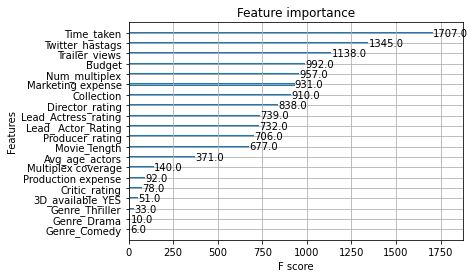

In [45]:
xgb.plot_importance(xgb_clf)

In [46]:
xgb_clf2=xgb.XGBClassifier(n_estimators=250,learning_rate=0.1,random_state=42)

In [47]:
param_test1 = {
    'max_depth':range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample':[0.8,0.9],
    'colsample_bytree':[0.8,0.9],
    'reg_alpha':[1e-2,0.1,1]
}

In [48]:
grid_search = GridSearchCV(xgb_clf2,param_test1,n_jobs=-1,cv=5,scoring='accuracy')

In [49]:
grid_search.fit(X_train,y_train)

E:\anaconda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:51:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n...one,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                  

In [50]:
grid_search.best_params_

{'colsample_bytree': 0.8,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.8}

In [51]:
cvxg_clf=grid_search.best_estimator_

In [52]:
accuracy_score(y_test,cvxg_clf.predict(X_test))

0.6176470588235294